In [34]:
!pip install auto-sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
import pandas as pd

In [77]:
df_train = pd.read_excel(r'/content/bike_train.xlsx')
df_test = pd.read_excel(r'/content/bike_test.xlsx')

In [37]:
df_train.head(1)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16


In [78]:
columns = set(list(df_train.columns.values)).intersection(list(df_test.columns.values))
target = df_train.pop('cnt')
drop = [x for x in df_train.columns if x not in columns]
df_train.drop(columns='dteday', inplace=True)
df_test.drop(columns='dteday', inplace=True)


In [79]:
df_train.drop(columns=drop, inplace=True)

In [80]:
df_train.shape, df_test.shape, target.shape

((11999, 13), (5380, 13), (11999,))

In [41]:
df_train

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11994,11995,2,1,5,23,0,6,0,1,0.60,0.6212,0.56,0.1642
11995,11996,2,1,5,0,0,0,0,1,0.58,0.5455,0.53,0.1045
11996,11997,2,1,5,1,0,0,0,1,0.56,0.5303,0.52,0.0000
11997,11998,2,1,5,2,0,0,0,1,0.56,0.5303,0.52,0.0000


In [59]:
df_train.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'instant'],
      dtype='object')

In [58]:
df_test.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'instant'],
      dtype='object')

In [57]:
feature_types = ['Categorical']*8+['Numerical']*5
feature_types

['Categorical',
 'Categorical',
 'Categorical',
 'Categorical',
 'Categorical',
 'Categorical',
 'Categorical',
 'Categorical',
 'Numerical',
 'Numerical',
 'Numerical',
 'Numerical',
 'Numerical']

In [81]:
instant = df_train.pop('instant')
instant_2 = df_test.pop('instant') 

In [82]:
df_train = pd.concat([df_train,instant], axis=1)
df_test = pd.concat([df_test,instant_2], axis=1)

In [76]:
df_train

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,instant
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,1
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,2
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,3
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,4
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11994,2,1,5,23,0,6,0,1,0.60,0.6212,0.56,0.1642,11995
11995,2,1,5,0,0,0,0,1,0.58,0.5455,0.53,0.1045,11996
11996,2,1,5,1,0,0,0,1,0.56,0.5303,0.52,0.0000,11997
11997,2,1,5,2,0,0,0,1,0.56,0.5303,0.52,0.0000,11998


In [46]:
#df_train = pd.concat([df_train,y_train], axis=1)

In [84]:
X_train = df_train.to_numpy()#[:, :-1]
y_train = target.to_numpy()
X_train.shape, y_train.shape

((11999, 13), (11999,))

In [85]:
X_test = df_test.to_numpy()#[:, :-1]
y_test = df_test.to_numpy()[:, 0]
X_test.shape, y_test.shape

((5380, 13), (5380,))

In [63]:
import autosklearn.regression

In [64]:
autosklearn_regressor = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=240,
    per_run_time_limit=60,
)

In [86]:
autosklearn_regressor.fit(X_train, y_train, feat_type=feature_types)

AutoSklearnRegressor(per_run_time_limit=60, time_left_for_this_task=240)

In [66]:
print(autosklearn_regressor.leaderboard())

          rank  ensemble_weight               type  cost  duration
model_id                                                          
4            1             0.14     ard_regression   0.0  1.560539
6            2             0.22  gradient_boosting   0.0  2.066326
7            3             0.10  gradient_boosting   0.0  3.625132
9            4             0.08  gradient_boosting   0.0  3.931206
10           5             0.18  gradient_boosting   0.0  3.948101
17           6             0.16           adaboost   0.0  0.940830
19           7             0.12        extra_trees   0.0  8.928014


In [87]:
from sklearn.metrics import mean_squared_error as rmse

#rms = mean_squared_error(y_actual, y_predicted, squared=False)
rmse(y_train, autosklearn_regressor.predict(X_train))
#rmse(y_test, autosklearn_regressor.predict(X_test))

476.69769899406754

In [88]:
y_train

array([ 16,  40,  32, ..., 130,  98,  66])

In [89]:
prediction = autosklearn_regressor.predict(X_train)
prediction

array([ 29.45432317,  24.79986358,  15.4861933 , ..., 131.74571657,
       107.07485342,  61.00139928])

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
df_predicted = df_train

In [91]:
df_predicted['predicted'] = prediction

In [93]:
df_predicted['value'] = y_train

In [94]:
df_predicted

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,instant,predicted,value
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,1,29.454323,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,2,24.799864,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,3,15.486193,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,4,4.979380,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,5,1.481998,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11994,2,1,5,23,0,6,0,1,0.60,0.6212,0.56,0.1642,11995,246.703948,239
11995,2,1,5,0,0,0,0,1,0.58,0.5455,0.53,0.1045,11996,149.081325,170
11996,2,1,5,1,0,0,0,1,0.56,0.5303,0.52,0.0000,11997,131.745717,130
11997,2,1,5,2,0,0,0,1,0.56,0.5303,0.52,0.0000,11998,107.074853,98


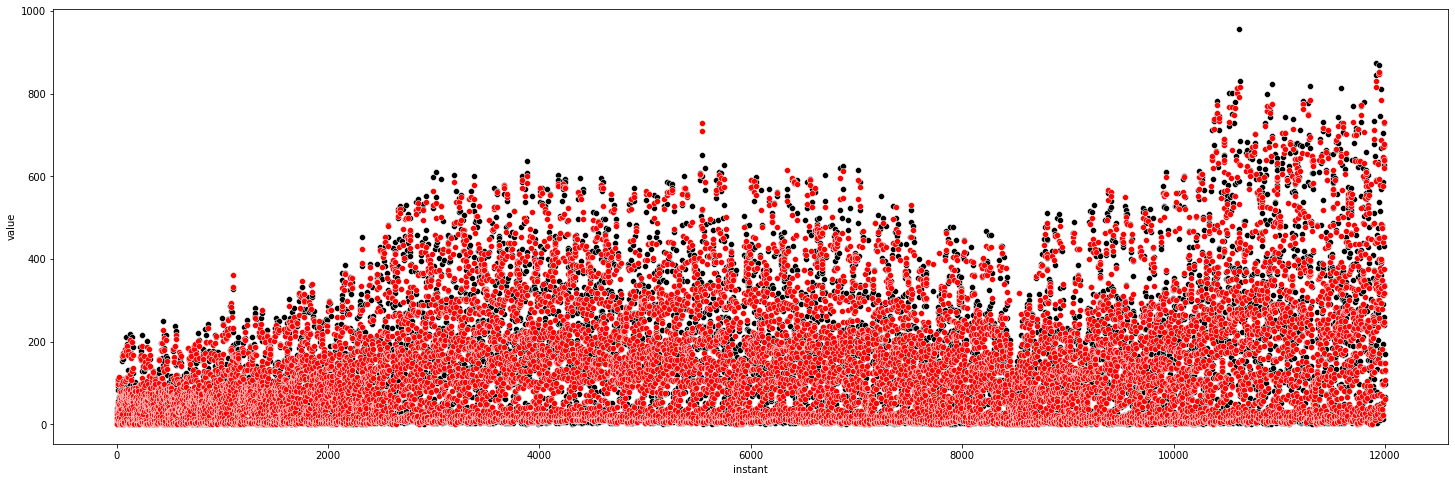

In [97]:
plt.figure(figsize=(25,8))
ax = sns.scattereplot(
    data=df_train, x="instant", y="value", color="black",
)
ax2 = sns.scatterplot(
    data=df_train, x='instant', y='predicted', color='red'

In [114]:
sample = df_predicted[(df_predicted['instant'] > 10000)]

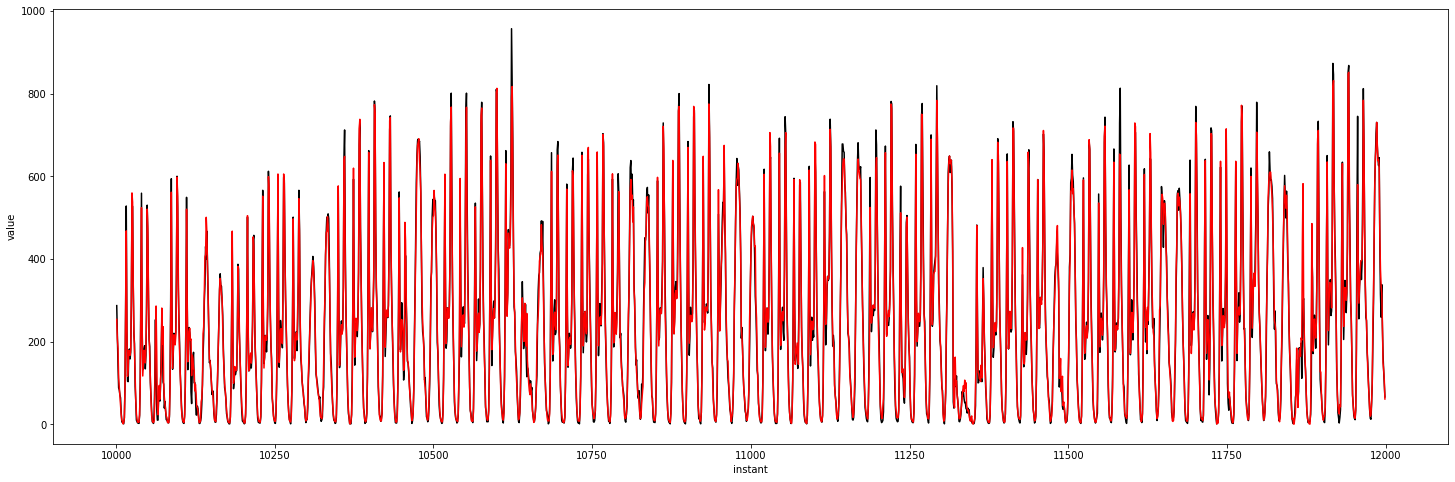

In [115]:
plt.figure(figsize=(25,8))
ax = sns.lineplot(
    data=sample, x="instant", y="value", color="black",
)
ax2 = sns.lineplot(
    data=sample, x='instant', y='predicted', color='red'
)

In [105]:
test_prediction = autosklearn_regressor.predict(X_test)

In [117]:
df_test['predict'] = test_prediction

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,instant,predict
0,2,1,5,4,0,0,0,1,0.52,0.5000,0.68,0.0896,12000,32.697302
1,2,1,5,5,0,0,0,1,0.50,0.4848,0.72,0.1045,12001,25.821782
2,2,1,5,6,0,0,0,1,0.50,0.4848,0.63,0.1343,12002,39.313092
3,2,1,5,7,0,0,0,1,0.52,0.5000,0.68,0.1940,12003,116.029743
4,2,1,5,8,0,0,0,1,0.56,0.5303,0.56,0.1642,12004,220.505647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,17375,273.891975
5376,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,17376,176.639890
5377,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,17377,144.914248
5378,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,17378,90.350166


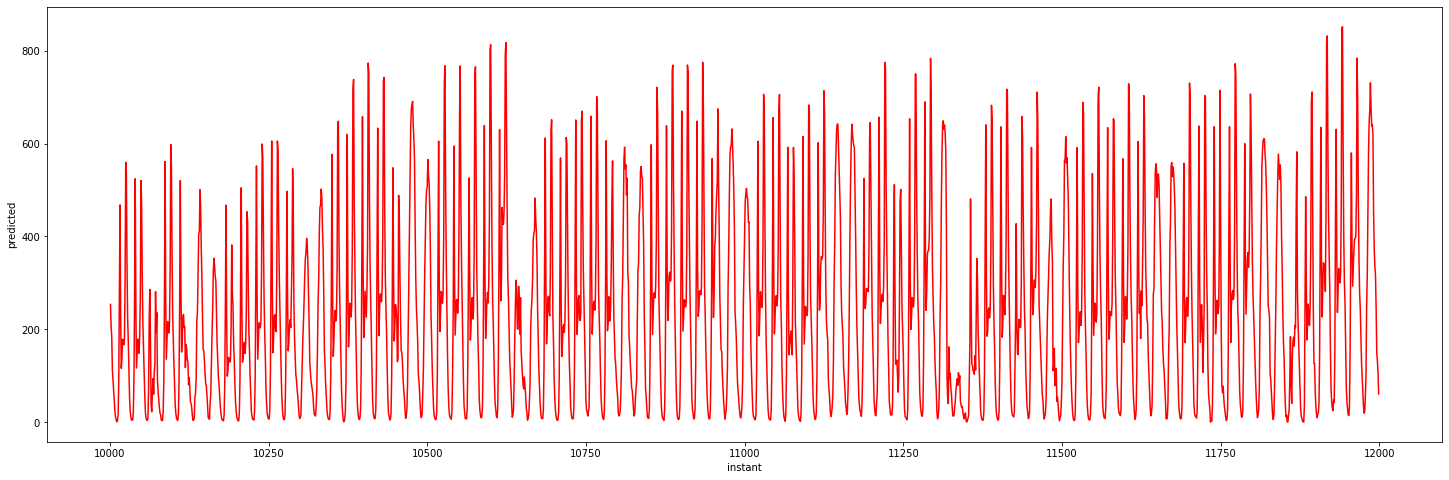

In [119]:
plt.figure(figsize=(25,8))
ax2 = sns.lineplot(
    data=sample, x='instant', y='predicted', color='red'
)